In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import importlib

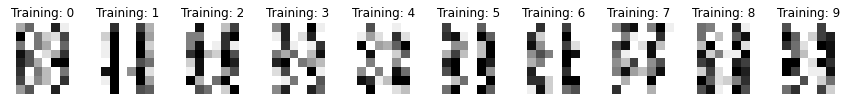

In [2]:
obfuscator = importlib.machinery.SourceFileLoader('obfuscator', './obfuscator.py').load_module()
X, y = obfuscator.get_obfuscated_dataset()
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
n_samples = len(X)
print(f"A total of {n_samples} images are in this dataset")

A total of 1797 images are in this dataset


In [4]:
from sklearn.tree import DecisionTreeClassifier as dtc

data = X.reshape((n_samples, -1))

clf = dtc()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.5)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
print(predicted)

[3 4 0 3 8 7 4 4 2 9 8 5 7 5 7 1 8 8 8 2 7 9 8 4 9 3 2 1 1 1 1 4 6 2 4 2 7
 2 5 7 6 5 2 8 4 3 8 6 5 4 1 7 2 4 5 1 4 8 4 9 1 2 4 1 8 5 1 3 8 3 7 9 0 6
 4 8 3 1 6 6 2 3 1 5 0 9 5 8 8 6 3 7 1 5 2 2 6 8 6 7 5 5 3 2 3 4 4 0 1 8 0
 1 2 2 2 5 0 3 8 9 5 6 9 1 2 4 7 4 1 0 1 3 8 0 0 3 5 8 2 6 7 6 5 2 5 5 4 5
 1 8 7 5 5 0 1 4 5 2 1 4 8 9 2 6 4 0 9 1 5 4 8 1 6 2 0 1 9 1 3 2 1 2 8 6 6
 0 3 5 8 8 1 5 7 2 9 7 5 6 1 3 4 6 6 6 5 7 5 1 4 5 2 5 7 6 1 3 0 3 9 2 7 9
 7 1 6 9 0 7 1 7 9 0 8 7 4 7 4 3 9 0 5 6 8 6 5 5 6 4 3 7 3 3 9 3 3 5 0 3 4
 7 3 0 3 0 4 0 2 8 3 0 4 4 9 8 1 6 6 0 6 0 1 6 9 6 0 1 6 4 7 7 5 0 7 3 4 8
 7 1 2 4 7 0 7 0 9 4 9 9 5 8 3 6 3 6 5 7 2 3 1 9 5 9 2 4 2 2 4 8 6 9 6 4 0
 5 5 5 7 9 1 5 2 5 7 4 1 0 1 3 3 1 0 2 8 8 8 6 8 6 9 3 1 9 5 3 1 7 9 9 3 4
 5 3 5 8 4 1 7 7 2 3 1 7 0 4 6 9 8 8 7 2 8 8 8 6 7 6 1 8 1 1 6 5 2 2 4 4 2
 6 5 5 5 1 4 8 6 4 5 7 0 9 9 1 9 0 9 3 4 6 0 2 8 5 4 1 2 4 0 5 3 4 8 7 4 1
 8 3 8 8 6 6 3 4 8 3 3 9 0 4 7 4 7 1 5 4 1 9 1 7 6 7 7 1 1 1 8 2 9 3 5 6 6
 0 9 0 5 2 7 3 4 2 0 6 2 

In [5]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        85
           1       0.71      0.86      0.77        84
           2       0.88      0.76      0.81        95
           3       0.80      0.76      0.78        86
           4       0.83      0.94      0.88        88
           5       0.83      0.89      0.86        92
           6       0.91      0.89      0.90        88
           7       0.81      0.84      0.82        87
           8       0.72      0.73      0.73        93
           9       0.93      0.76      0.84       101

    accuracy                           0.83       899
   macro avg       0.84      0.84      0.83       899
weighted avg       0.84      0.83      0.83       899




Confusion matrix:
[[79  0  0  0  5  0  0  0  1  0]
 [ 0 72  1  0  1  1  3  1  4  1]
 [ 0  4 72  2  1  5  2  2  7  0]
 [ 0  6  1 65  0  2  1  3  6  2]
 [ 0  0  0  1 83  2  0  2  0  0]
 [ 1  3  0  1  2 82  0  0  3  0]
 [ 0  2  1  1  3  2 78  0  1  0]
 [ 1  2  1  1  4  2  0 73  1  2]
 [ 0  7  6  6  0  1  1  3 68  1]
 [ 1  6  0  4  1  2  1  6  3 77]]


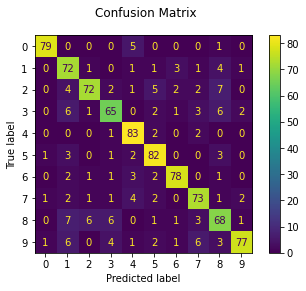

In [6]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()